In [58]:
# !unzip /content/Flicker8k_Dataset.zip -d images
# !unzip Flickr8k_text.zip -d captions

In [59]:
# !rm -rf /content/captions/CrowdFlowerAnnotations.txt
# !rm -rf /content/captions/ExpertAnnotations.txt
# !rm -rf /content/captions/readme.txt

# !rm -rf /content/Flicker8k_Dataset.zip
# !rm -rf /content/Flickr8k_text.zip

In [1]:
# !wget -q --show-progress http://nlp.stanford.edu/data/glove.42B.300d.zip

glove.42B.300d.zip  100%[===================>]   1.75G  4.85MB/s    in 5m 55s  


In [3]:
# !unzip -q glove.42B.300d.zip

In [4]:
# !rm glove.42B.300d.zip

In [62]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# data=pd.read_csv("captions/Flickr8k.token.txt",sep='\t')

In [ ]:
# data.shape, image_captions.shape

((40459, 2), (40460, 2))

In [63]:
# data=pd.read_csv("captions/Flickr8k.lemma.token.txt",sep='\t')
# data
image_captions=pd.read_csv("captions/Flickr8k.lemma.token.txt",sep='\t',names=["img_id","img_caption"])
x_train=pd.read_csv("captions/Flickr_8k.trainImages.txt",names=["img_id"])
y_test=pd.read_csv("captions/Flickr_8k.testImages.txt",names=["img_id"])
val_test=pd.read_csv("captions/Flickr_8k.devImages.txt",names=["img_id"])

In [64]:
len(x_train), len(y_test), len(val_test)

(6000, 1000, 1000)

In [65]:
image_captions.head(5)

img_id  \
0  1305564994_00513f9a5b.jpg#0   
1  1305564994_00513f9a5b.jpg#1   
2  1305564994_00513f9a5b.jpg#2   
3  1305564994_00513f9a5b.jpg#3   
4  1305564994_00513f9a5b.jpg#4   

                                         img_caption  
0  A man in street racer armor be examine the tir...  
1         Two racer drive a white bike down a road .  
2  Two motorist be ride along on their vehicle th...  
3  Two person be in a small race car drive by a g...  
4       Two person in race uniform in a street car .

In [9]:
# image_captions["img_id"]=image_captions["img_id"].map(lambda x: x[:len(x)-2])

In [10]:
# image_captions.head(5)

In [66]:
from string import punctuation
import re

In [67]:
image_captions['img_caption']= image_captions['img_caption'].apply(lambda x: re.sub("["+punctuation+"]", " ", x))

In [13]:
# image_captions

In [68]:
image_captions['img_caption']= image_captions['img_caption'].apply(lambda x: re.sub("\d", " ", x))
image_captions['img_caption']= image_captions['img_caption'].apply(lambda x: re.sub("\s+", " ", x))

In [69]:
image_captions["img_caption"]=image_captions["img_caption"].map(lambda x: "<start> " + x.strip().lower() + " <end>")

In [16]:
# image_captions

In [17]:
# x_train.head(5),y_test.head(5),val_test.head(5)

In [70]:
train_captions = {}

for ix in range(len(x_train)):
    temp = image_captions["img_id"][ix].split("#")
    # print(temp)
    # print(image_captions["img_caption"][ix])
    if temp[0] in train_captions:
        train_captions[temp[0]].append(image_captions["img_caption"][ix])
    else:
        train_captions[temp[0]] = [image_captions["img_caption"][ix]]

In [ ]:
# train_captions

In [71]:
test_captions = {}

for ix in range(len(y_test)):
    temp = image_captions["img_id"][ix].split("#")
    # print(temp)
    # print(image_captions["img_caption"][ix])
    if temp[0] in test_captions:
        test_captions[temp[0]].append(image_captions["img_caption"][ix])
    else:
        test_captions[temp[0]] = [image_captions["img_caption"][ix]]

In [72]:
val_captions = {}

for ix in range(len(val_test)):
    temp = image_captions["img_id"][ix].split("#")
    # print(temp)
    # print(image_captions["img_caption"][ix])
    if temp[0] in val_captions:
        val_captions[temp[0]].append(image_captions["img_caption"][ix])
    else:
        val_captions[temp[0]] = [image_captions["img_caption"][ix]]

In [ ]:
# val_captions

In [73]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras import layers, models

In [74]:
encode_model = InceptionV3(weights='imagenet')
encode_model = models.Model(encode_model.input, encode_model.layers[-2].output)

In [75]:
w=299
h=299
output_dim=2048
start="staaaart"
end="ennnnd"
epochs=10

In [76]:
import tensorflow.keras.preprocessing.image as tf_image

In [77]:
# Preprocess image

def encode_image(img):
  img=img.resize((w,h))
  x=tf_image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  x = encode_model.predict(x)
  x=np.reshape(x,output_dim)

  return x

In [78]:
img_dir = "/content/images"
x_train_img_encoded={}
y_test_img_encoded={}
val_test_img_encoded={}

for img_name in train_captions:
  image_path = os.path.join(img_dir, img_name)
  # print(image_path)
  img = tf_image.load_img(image_path,target_size=(w,h))
  x_train_img_encoded[img_name] = encode_image(img)




1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━

In [79]:
len(x_train_img_encoded), len(train_captions)

(1200, 1200)

In [80]:
import pickle

In [81]:
with open( "train_encoded_images.p", "wb" ) as pickle_f:
    pickle.dump(x_train_img_encoded, pickle_f )

In [ ]:
# !rm -rf /content/glove.42B.300d.zip

In [82]:
for img_name in test_captions:
  image_path = os.path.join(img_dir, img_name)
  # print(image_path)
  img = tf_image.load_img(image_path,target_size=(w,h))
  y_test_img_encoded[img_name] = encode_image(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━

In [83]:
len(y_test_img_encoded), len(test_captions)

(200, 200)

In [84]:
with open( "test_encoded_images.p", "wb" ) as pickle_f:
    pickle.dump(x_train_img_encoded, pickle_f )

In [85]:
for img_name in val_captions:
  image_path = os.path.join(img_dir, img_name)
  # print(image_path)
  img = tf_image.load_img(image_path,target_size=(w,h))
  val_test_img_encoded[img_name] = encode_image(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━

In [86]:
len(val_test_img_encoded), len(val_captions)

(200, 200)

In [87]:
with open( "val_encoded_images.p", "wb" ) as pickle_f:
    pickle.dump(x_train_img_encoded, pickle_f )

In [88]:
image_path

'/content/images/2911107495_e3cec16a24.jpg'

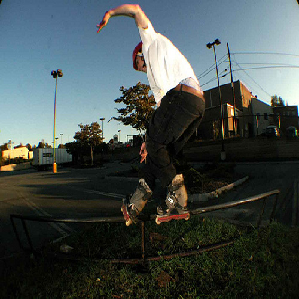

In [89]:
tf_image.load_img(image_path,target_size=(w,h))

In [90]:
image_captions[image_captions['img_id']=='2911107495_e3cec16a24.jpg#0']

img_id  \
995  2911107495_e3cec16a24.jpg#0   

                                           img_caption  
995  <start> a man do a skate trick on a metal rail...

In [91]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [92]:
from nltk import word_tokenize

In [93]:
all_captions=[]
for img_id in train_captions:
  for captions in train_captions[img_id]:
    all_captions.append(captions)

In [94]:
len(all_captions), all_captions[0:8]

(6000,
 ['<start> a man in street racer armor be examine the tire of another racer s motorbike <end>',
  '<start> two racer drive a white bike down a road <end>',
  '<start> two motorist be ride along on their vehicle that be oddly design and color <end>',
  '<start> two person be in a small race car drive by a green hill <end>',
  '<start> two person in race uniform in a street car <end>',
  '<start> a firefighter extinguish a fire under the hood of a car <end>',
  '<start> a fireman spray water into the hood of small white car on a jack <end>',
  '<start> a fireman spray inside the open hood of small white car on a jack <end>'])

In [95]:

word_tokenize(all_captions[0])

['<',
 'start',
 '>',
 'a',
 'man',
 'in',
 'street',
 'racer',
 'armor',
 'be',
 'examine',
 'the',
 'tire',
 'of',
 'another',
 'racer',
 's',
 'motorbike',
 '<',
 'end',
 '>']

In [96]:
word_count_limit = 3
word_count = {}

for caption in all_captions:
  for w in word_tokenize(caption):
    word_count[w]= word_count.get(w,0)+1

len(word_count)

2367

In [97]:
word_count

{'<': 12000,
 'start': 6020,
 '>': 12000,
 'a': 10444,
 'man': 1582,
 'in': 2631,
 'street': 96,
 'racer': 49,
 'armor': 2,
 'be': 2008,
 'examine': 2,
 'the': 1871,
 'tire': 11,
 'of': 844,
 'another': 154,
 's': 30,
 'motorbike': 26,
 'end': 6007,
 'two': 527,
 'drive': 65,
 'white': 516,
 'bike': 470,
 'down': 355,
 'road': 86,
 'motorist': 1,
 'ride': 601,
 'along': 73,
 'on': 1789,
 'their': 91,
 'vehicle': 23,
 'that': 38,
 'oddly': 1,
 'design': 1,
 'and': 855,
 'color': 5,
 'person': 731,
 'small': 64,
 'race': 232,
 'car': 138,
 'by': 165,
 'green': 191,
 'hill': 135,
 'uniform': 179,
 'firefighter': 4,
 'extinguish': 2,
 'fire': 36,
 'under': 20,
 'hood': 5,
 'fireman': 6,
 'spray': 10,
 'water': 303,
 'into': 165,
 'jack': 3,
 'inside': 8,
 'open': 16,
 'use': 12,
 'firehose': 1,
 'engine': 1,
 'up': 207,
 'carjack': 1,
 'to': 489,
 'boy': 344,
 'sand': 41,
 'surf': 97,
 'attempt': 60,
 'make': 108,
 'sunny': 7,
 'day': 13,
 'slide': 52,
 'huge': 28,
 'dune': 11,
 'young': 1

In [98]:
vocab=[w for w in word_count if word_count[w]>=word_count_limit]

In [99]:
len(vocab)

1075

In [100]:
caption_lens = []
for caption in all_captions:
  words = word_tokenize(caption)
  words = [w for w in words if w in vocab]
  caption_lens.append(len(words))


In [101]:
max_length = max(caption_lens)

In [102]:
idxtoword={}
wordtoidx={}

ix=1
for w in vocab:
  wordtoidx[w]=ix
  idxtoword[ix]=w
  ix+=1

In [103]:
vocab_size = len(idxtoword)+1
vocab_size

1076

In [104]:
glove_path='/content/glove.42B.300d.txt'

In [105]:
embeddings_index = {}
f = open(glove_path, encoding = "utf-8")

for line in f:
  line = line.strip()
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype = 'float32')
  embeddings_index[word] = coefs

f.close()

In [106]:
len(embeddings_index)#,embeddings_index

1917494

In [107]:
embedding_dim = 300

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in wordtoidx.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [108]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.35879999,  0.2207    , -0.25656   , ..., -0.52657002,
        -0.21464001,  0.073675  ],
       [-0.30129999,  0.49315   , -0.47455999, ...,  0.25940001,
        -0.10967   , -0.25983   ],
       ...,
       [-0.38406   , -0.45148   ,  0.067191  , ...,  0.73514998,
        -0.1318    , -0.53507   ],
       [ 0.23214   , -0.34979999,  0.23449001, ...,  0.012341  ,
        -0.164     ,  0.20671   ],
       [ 0.070265  , -0.4991    , -0.83731002, ..., -0.59553999,
        -0.12298   , -0.20606001]])

In [109]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [110]:
for each in train_captions["2911107495_e3cec16a24.jpg"]:
  print(word_tokenize(each))

['<', 'start', '>', 'a', 'man', 'do', 'a', 'skate', 'trick', 'on', 'a', 'metal', 'railing', '<', 'end', '>']
['<', 'start', '>', 'an', 'inline', 'skater', 'go', 'down', 'a', 'handrail', '<', 'end', '>']
['<', 'start', '>', 'a', 'rollerblader', 'grind', 'a', 'rail', '<', 'end', '>']
['<', 'start', '>', 'a', 'skateboarder', 'at', 'dusk', '<', 'end', '>']
['<', 'start', '>', 'boy', 'skate', 'on', 'a', 'railing', 'in', 'a', 'park', 'lot', '<', 'end', '>']


In [111]:
def data_generator(data, encoded_images, wordtoidx, max_length, num_photos_per_batch):
  # x1 - Training data for photos
  # x2 - The caption that goes with each photo
  # y - The predicted rest of the caption
  x1, x2, y = [], [], []
  n=0
  while True:
    for k,captions in data.items():
      n+=1
      photo = encoded_images[k]
      for caption in captions:
        seq = [wordtoidx[word] for word in word_tokenize(caption) if word in wordtoidx]
          # Generate a training case for every possible sequence and outcome
        for i in range(1, len(seq)):
          in_seq, out_seq = seq[:i], seq[i]
          in_seq = pad_sequences([in_seq], maxlen=max_length,padding='post')[0]
          out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
          x1.append(photo)
          x2.append(in_seq)
          y.append(out_seq)
      if n==num_photos_per_batch:
        yield ((np.array(x1), np.array(x2)), np.array(y))
        # next when generator gets called iteration will start from where we left off
        # this makes it make a pass through the complete data in an epoch
        x1, x2, y = [], [], []
        n=0

In [115]:
from tensorflow.keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector, Input,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization,add

In [118]:
inputs1 = Input(shape=(output_dim,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)

decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

caption_model = models.Model(inputs=[inputs1, inputs2], outputs=outputs)
caption_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 35)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_4             │ (None, 2048)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 35, 300)        │        322,800 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 2048)           │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 35, 300)        │              0 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_1 (NotEqual)    │ (None, 35)             │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 256)            │        524,544 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 256)            │        570,368 │ dropout_3[0][0],       │
│                           │                        │                │ not_equal_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 256)            │              0 │ dense_3[0][0],         │
│                           │                        │                │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 256)            │         65,792 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1076)           │        276,532 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,760,036 (6.71 MB)

 Trainable params: 1,760,036 (6.71 MB)

 Non-trainable params: 0 (0.00 B)

In [119]:
caption_model.layers[2].set_weights([embedding_matrix])
caption_model.layers[2].trainable = False
caption_model.compile(loss='categorical_crossentropy', optimizer='adam')

In [124]:
number_pics_per_batch = 20
steps = len(all_captions)//number_pics_per_batch

In [125]:
steps

300

In [126]:
for i in range(epochs*2):
  generator = data_generator(train_captions, x_train_img_encoded, wordtoidx, max_length, number_pics_per_batch)
  caption_model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

300/300 ━━━━━━━━━━━━━━━━━━━━ 48s 133ms/step - loss: 3.5366
300/300 ━━━━━━━━━━━━━━━━━━━━ 40s 133ms/step - loss: 2.0770
300/300 ━━━━━━━━━━━━━━━━━━━━ 39s 130ms/step - loss: 1.7807
300/300 ━━━━━━━━━━━━━━━━━━━━ 39s 130ms/step - loss: 1.6025
300/300 ━━━━━━━━━━━━━━━━━━━━ 43s 144ms/step - loss: 1.4639
300/300 ━━━━━━━━━━━━━━━━━━━━ 40s 132ms/step - loss: 1.3426
300/300 ━━━━━━━━━━━━━━━━━━━━ 41s 137ms/step - loss: 1.2420
300/300 ━━━━━━━━━━━━━━━━━━━━ 39s 128ms/step - loss: 1.1556
300/300 ━━━━━━━━━━━━━━━━━━━━ 40s 133ms/step - loss: 1.0860
300/300 ━━━━━━━━━━━━━━━━━━━━ 39s 130ms/step - loss: 1.0036
300/300 ━━━━━━━━━━━━━━━━━━━━ 40s 132ms/step - loss: 0.9443
300/300 ━━━━━━━━━━━━━━━━━━━━ 39s 128ms/step - loss: 0.8902
300/300 ━━━━━━━━━━━━━━━━━━━━ 39s 129ms/step - loss: 0.8375
300/300 ━━━━━━━━━━━━━━━━━━━━ 38s 128ms/step - loss: 0.7930
300/300 ━━━━━━━━━━━━━━━━━━━━ 38s 128ms/step - loss: 0.7558
300/300 ━━━━━━━━━━━━━━━━━━━━ 38s 128ms/step - loss: 0.7357
300/300 ━━━━━━━━━━━━━━━━━━━━ 41s 136ms/step - loss: 0.70

In [127]:
caption_model.optimizer.lr = 1e-4
number_pics_per_batch = 40
steps = len(all_captions)//number_pics_per_batch

In [128]:
steps

150

In [129]:

for i in range(epochs):
    generator = data_generator(train_captions, x_train_img_encoded, wordtoidx, max_length, number_pics_per_batch)
    caption_model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

150/150 ━━━━━━━━━━━━━━━━━━━━ 36s 239ms/step - loss: 0.5969
150/150 ━━━━━━━━━━━━━━━━━━━━ 36s 239ms/step - loss: 0.5468
150/150 ━━━━━━━━━━━━━━━━━━━━ 36s 239ms/step - loss: 0.5220
150/150 ━━━━━━━━━━━━━━━━━━━━ 36s 240ms/step - loss: 0.5061
150/150 ━━━━━━━━━━━━━━━━━━━━ 36s 241ms/step - loss: 0.4914
150/150 ━━━━━━━━━━━━━━━━━━━━ 37s 245ms/step - loss: 0.4813
150/150 ━━━━━━━━━━━━━━━━━━━━ 38s 256ms/step - loss: 0.4688
150/150 ━━━━━━━━━━━━━━━━━━━━ 39s 259ms/step - loss: 0.4578
150/150 ━━━━━━━━━━━━━━━━━━━━ 36s 242ms/step - loss: 0.4492
150/150 ━━━━━━━━━━━━━━━━━━━━ 36s 241ms/step - loss: 0.4426


In [131]:
caption_model.save_weights('caption_model.weights.h5')

model_pkl_file = "img_caption_model.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(caption_model, file)

In [163]:
start.split(), output_dim, wordtoidx['start']

(['<start>'], 2048, 2)

In [168]:
def generateCaption(photo):

    photo=photo.reshape(1,2048)
    in_text='start'
    for i in range(max_length):
      sequence = [wordtoidx[s] for s in in_text.split(" ") if s in wordtoidx]
      sequence = pad_sequences([sequence], maxlen=max_length, padding='post')
      y_pred = caption_model.predict([photo,sequence],verbose=0)
      y_pred = np.argmax(y_pred[0])
      word = idxtoword[y_pred]
      in_text += ' ' + word
      if word == 'end':
        break
    final = in_text.split()
    final = final[2:-2]

    return final

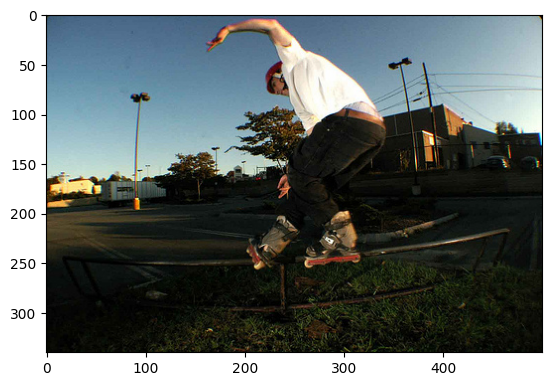

Caption: a skateboarder at dusk


In [172]:

image_file="2911107495_e3cec16a24.jpg"
image=x_train_img_encoded[image_file]
path = os.path.join(img_dir, image_file)

image = image.reshape((1,output_dim))
x=plt.imread(path)
plt.imshow(x)
plt.show()
print("Caption:"," ".join(generateCaption(image)))

In [136]:
from nltk.translate.bleu_score import sentence_bleu
import cv2

In [174]:
import warnings
warnings.filterwarnings('ignore')

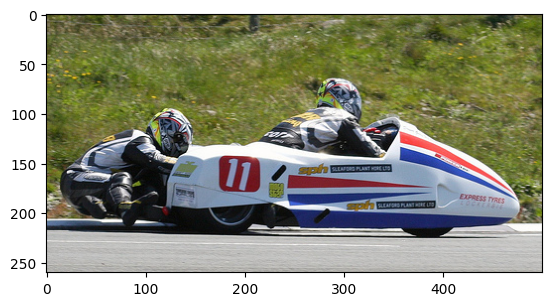

**Given captions for reference**
a man in street racer armor be examine the tire of another racer s motorbike
two racer drive a white bike down a road
two motorist be ride along on their vehicle that be oddly design and color
two person be in a small race car drive by a green hill
two person in race uniform in a street car

**Predicted Caption for the given image**
two person in a race car
bleu score:  4.953890078369194e-78


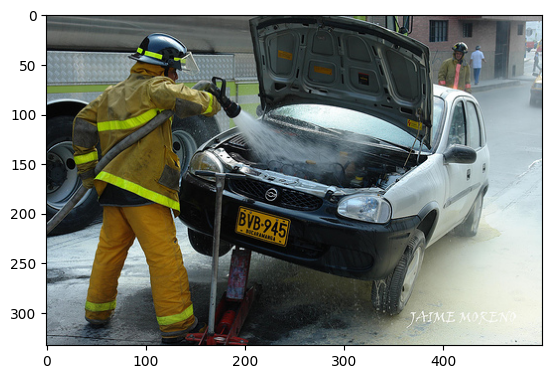

**Given captions for reference**
a firefighter extinguish a fire under the hood of a car
a fireman spray water into the hood of small white car on a jack
a fireman spray inside the open hood of small white car on a jack
a fireman use a firehose on a car engine that be up on a carjack
firefighter use water to extinguish a car that be on fire

**Predicted Caption for the given image**
a fireman use a on a car that be up on a
bleu score:  0.7540127609098941


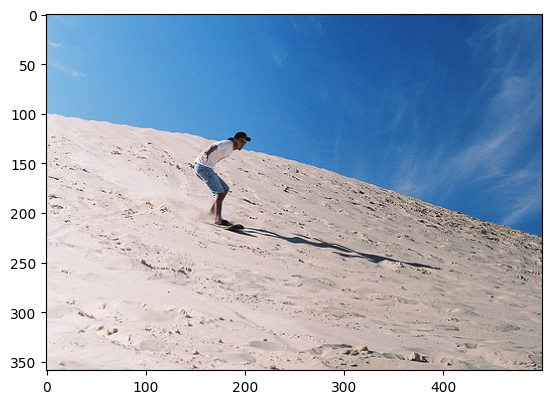

**Given captions for reference**
a boy sand surf down a hill
a man be attempt to surf down a hill make of sand on a sunny day
a man be slide down a huge sand dune on a sunny day
a man be surf down a hill of sand
a young man in short and t shirt be snowboard under a bright blue sky

**Predicted Caption for the given image**
a man be attempt to surf down a hill make of sand on a sunny day
bleu score:  1.0


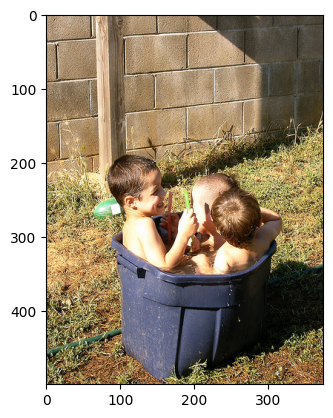

**Given captions for reference**
kid play in a blue tub full of water outside
on a hot day three small kid sit in a big container fill with water
little kid sit outdoors in a small tub of water
three child squeeze into a plastic tub fill with water and play
three little boy take a bath in a rubber bin on the grass

**Predicted Caption for the given image**
a hot take
bleu score:  1.2163566271735512e-155


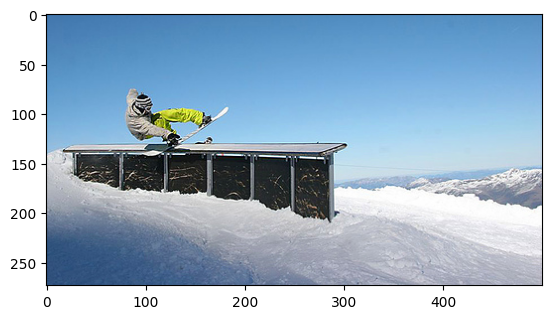

**Given captions for reference**
a man be snowboard over a structure on a snowy hill
a snowboarder jump through the air on a snowy hill
a snowboarder wear green pants do a trick on a high bench
someone in yellow pants be on a ramp over the snow
a man be perform a trick on a snowboard high in the air

**Predicted Caption for the given image**
a man be jump over a low snow ramp
bleu score:  5.105359651295608e-78


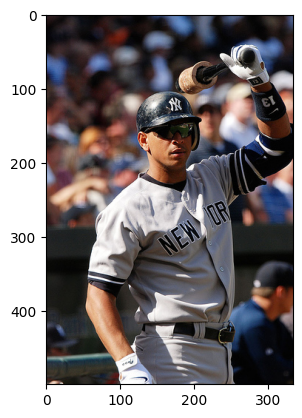

**Given captions for reference**
a baseball batter raise his arm
a baseball player from new york wait to bat during a game
a baseball player in a yankee uniform be hold a bat in one hand
a new york yankee hold up a bat
new york yankee warm up

**Predicted Caption for the given image**
a baseball player wear a red and white uniform raise his arm
bleu score:  5.731095145962094e-78


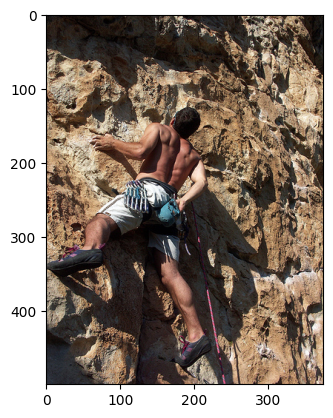

**Given captions for reference**
a bare backed climber be attach to the rock face on a pink safety rope
a lone rock climber in a harness climb a huge rock wall
a man be rock crawl up a rock wall
a man wear no shirt climb a steep cliff
man with no shirt on climb rock

**Predicted Caption for the given image**
a lone rock
bleu score:  3.2194137801761064e-78


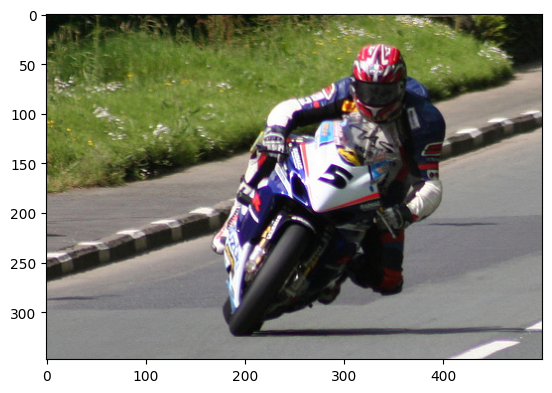

**Given captions for reference**
a competitive motorcycle racer prepare to make a left turn along a paved road
a man ride a motorcycle with the number on it
a motorcycle driver swerve to the left
a motorcycle with number five on front be be ride by a rider wear a red helmet
professional motorcycle racer turn a corner

**Predicted Caption for the given image**
a motorcycle driver turn his arm
bleu score:  6.206021746903507e-78


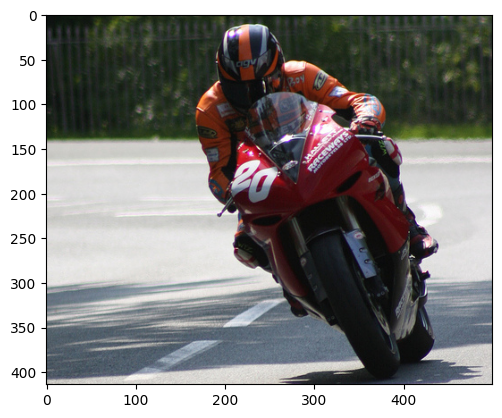

**Given captions for reference**
a man be ride on a red motorcycle
a motorcycle driver dress in orange gear swerve to the right
a motorcyclist on a red speed bike lean into a sharp turn
motorcyclist crouch low as he round a turn
this person be on a red motorcycle

**Predicted Caption for the given image**
a motorcyclist ride a red motorcycle on a racetrack
bleu score:  6.130783336563573e-78


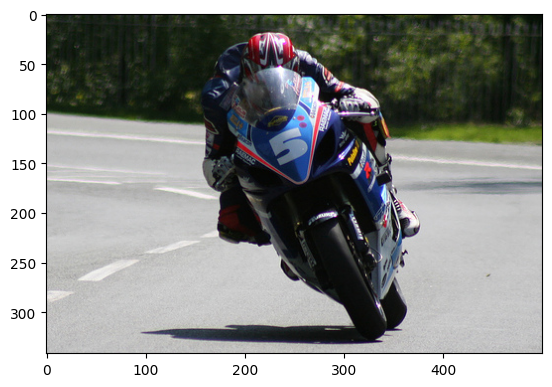

**Given captions for reference**
a motorcycle racer lean his bike
a motorcyclist be drive down a road on their motorbike
a motorcyclist be ride their sponsored car along a roadway that have recently turn
a motorcyclist on a street
a motorcyclist with a red helmet ride his blue motorcycle down a road

**Predicted Caption for the given image**
a motorcyclist be drive down a road
bleu score:  1.0


In [178]:
i=0
img_dir = '/content/images'
for img_name in test_captions:
  i+=1
  image_path = os.path.join(img_dir,img_name)
  img=cv2.imread(image_path)
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

  photo=y_test_img_encoded[img_name]
  plt.show()
  reference=[]
  for caps in test_captions[img_name]:
    list_caps=caps.split(" ")
    list_caps=list_caps[1:-1]
    reference.append(list_caps)
  candidate=generateCaption(photo)
  score = sentence_bleu(reference, candidate)
  print("**Given captions for reference**")
  for cap in reference:
    print(" ".join(cap))
  print("\n**Predicted Caption for the given image**")
  print(" ".join(candidate))
  print("bleu score: ",score)
  if(i==10):
    break

In [176]:
# Avg Bleau score

i=0
tot_score=0
for img_id in test_captions:
  i+=1
  photo=y_test_img_encoded[img_id]
  reference=[]
  for caps in test_captions[img_id]:
    list_caps=caps.split(" ")
    list_caps=list_caps[1:-1]
    reference.append(list_caps)
  candidate=generateCaption(photo)
  score = sentence_bleu(reference, candidate)
  tot_score+=score
avg_score=tot_score/i
print()
print(tot_score)
print("Average Score: ",avg_score)


88.96171224520667
Average Score:  0.44480856122603335
